# Shading Using Patterns in VCS <a id="top"></a>

- [Download Jupyter Notebook ipynb](./Shading_With_Patterns_in_VCS.ipynb)

This notebook shows how to use patterns in vcs.

Pattern can be used with isofill, boxfill, meshfill and fillarea object.

In this notebook we are using primirarly boxfill

## Contents
- [Prepare Notebook](#prepare)
- [Create Graphic Method](#create)
- [Mask some data](#mask)
- [Regular masking](#regular)
- [Using Opacity](#opacity)
- [Using Patterns](#pattern)
- [Controling Pattern Size](#pattern_size)
- [Controling Pattern Opacity](#pattern_size_opacity)
- [Controling Pattern Color](#color)
- [Adding A Pattern Legend](#legend)

## Prepare Notebook Elements<a id=prepare></a>
[(top)](#top)

In [1]:
import requests
import cdms2

r = requests.get("https://uvcdat.llnl.gov/cdat/sample_data/clt.nc",stream=True)
with open("clt.nc","wb") as f:
    for chunk in r.iter_content(chunk_size=1024):
        if chunk:  # filter local_filename keep-alive new chunks
            f.write(chunk)

# and load data
f = cdms2.open("clt.nc")
clt = f("clt",time=slice(0,1),squeeze=1) # Get first month

## Create default Graphic Method<a id=create></a>
[(top)](#top)

In [2]:
import vcs
import cdms2
x=vcs.init(bg=True)
gm = vcs.createboxfill()
gm.boxfill_type = "custom"

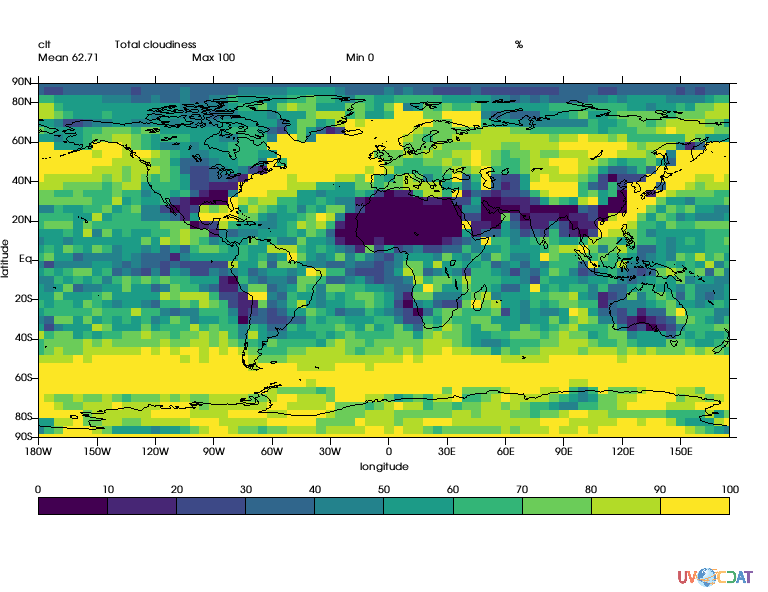

In [3]:
# Let's look at the data w/o pattern
x.plot(clt,gm)

## Mask some data<a id=mask></a>

Now let's assume we are only interested in areas where clt is greater than 60%
let's shade out areas where clt is < 60%

[(top)](#top)

In [4]:
import MV2
bad = MV2.less(clt,60.).astype("f")

## Method 1: Regular Masking<a id=regular></a>
[(top)](#top)

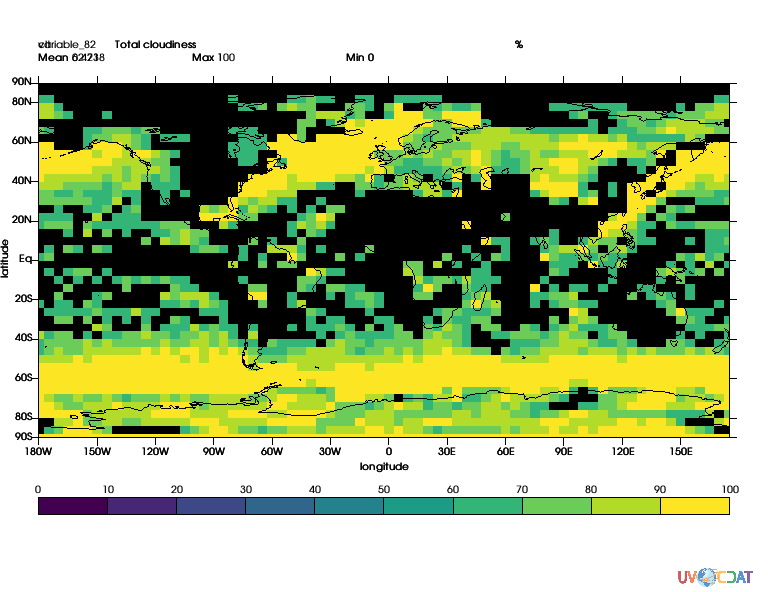

In [5]:
# let's create a second boxfill method 
gm2 = vcs.createboxfill()
gm2.boxfill_type = "custom"
# and a template for it
tmpl2 = vcs.createtemplate()
tmpl2.legend.priority=0
gm2.levels = [[0.5,1.]]  
gm2.fillareacolors = ["black",]
x.plot(bad,gm2,tmpl2)

## Method 2: Using Opacity<a id=opacity></a>
Let's use some opacity to "see" what's bellow
[(top)](#top)

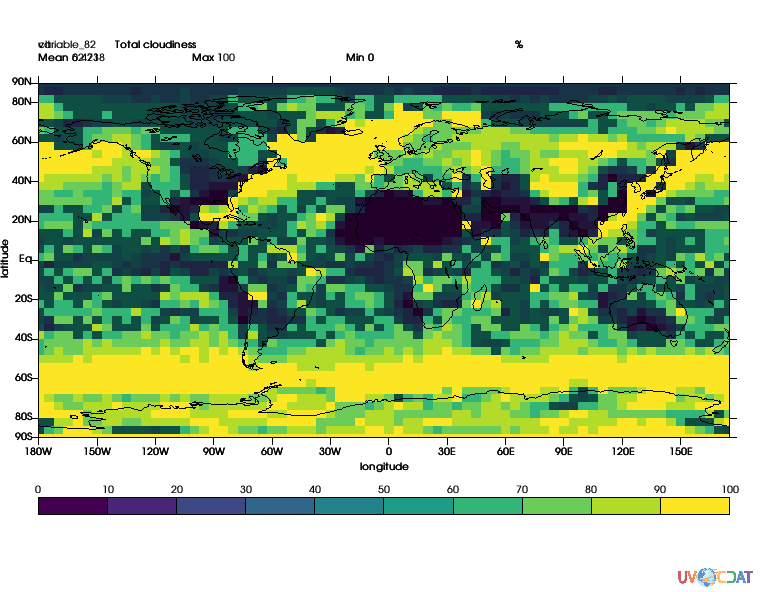

In [6]:
gm2.fillareaopacity = [50]
x.clear()
x.plot(clt,gm)
x.plot(bad,gm2,tmpl2)

## Method 3: Using Patterns<a id=pattern></a>
Rather than opacity, we can use patterns, that let us see better what's "underneath"
[(top)](#top)

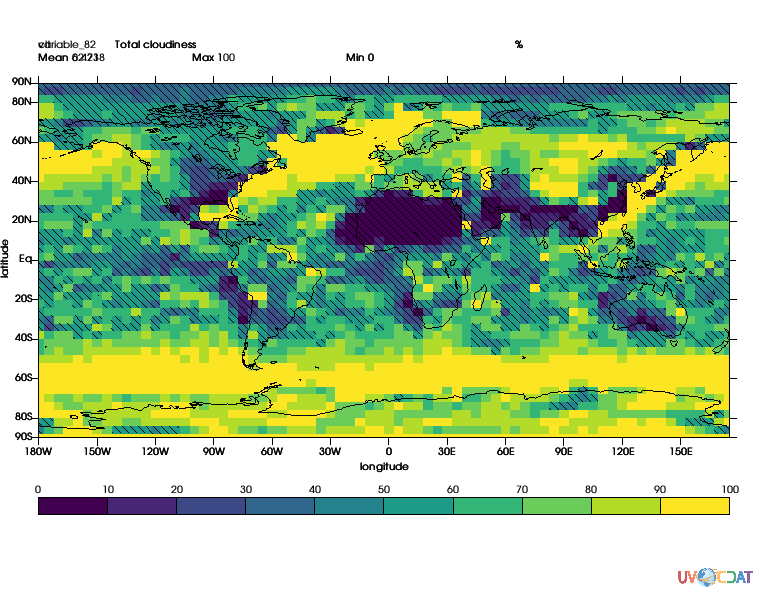

In [7]:
gm2.fillareastyle = "pattern"
gm2.fillareaindices = [10]
gm2.fillareaopacity = [100]
x.clear()
x.plot(clt,gm)
x.plot(bad,gm2,tmpl2)

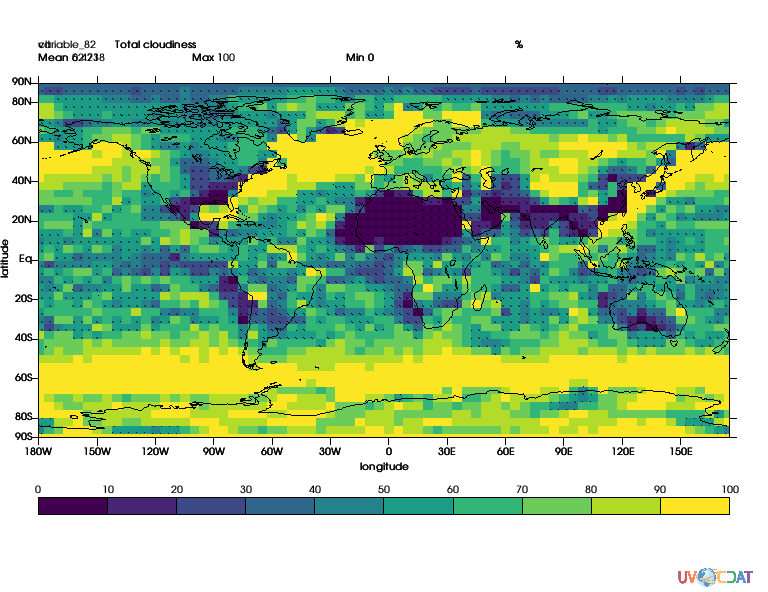

In [8]:
# we can control the size of patterns
gm2.fillareapixelscale = 2.
x.clear()
x.plot(clt,gm)
x.plot(bad,gm2,tmpl2)

## Controling Patterns Size<a id=pattern_size></a>
We can make the patterns bigger or smaller, using spacing
[(top)](#top)

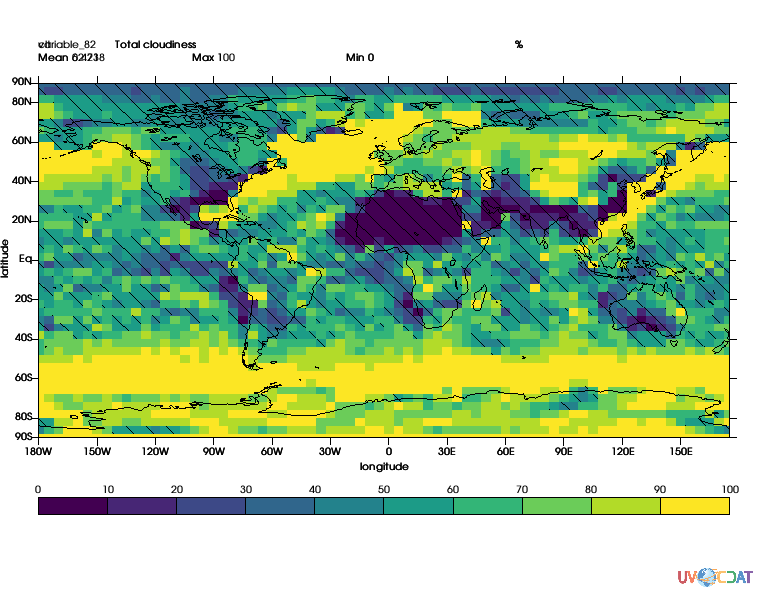

In [9]:
# Bigger
gm2.fillareapixelspacing = [20,20]
gm2.fillareapixelscale=None
x.clear()
x.plot(clt,gm)
x.plot(bad,gm2,tmpl2)

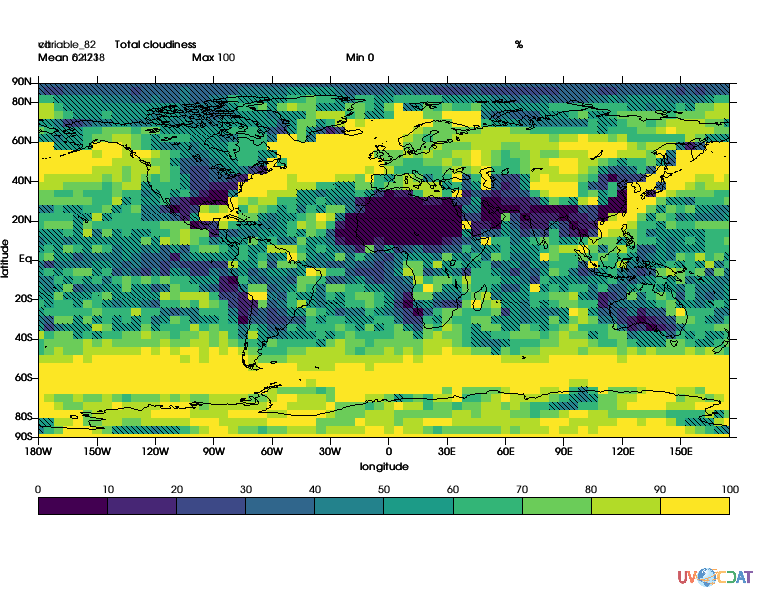

In [10]:
# or smaller
gm2.fillareapixelspacing = [5,5]
gm2.fillareapixelscale=None
x.clear()
x.plot(clt,gm)
x.plot(bad,gm2,tmpl2)

## Size and Opacity<a id=pattern_size_opactiy></a>
We can still add opacity
[(top)](#top)

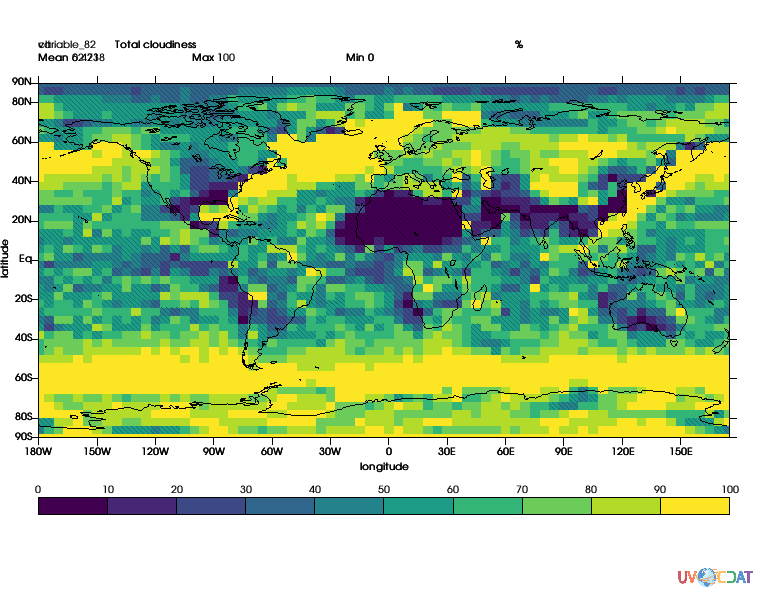

In [11]:
gm2.fillareaopacity = [25.]
x.clear()
x.plot(clt,gm)
x.plot(bad,gm2,tmpl2)

## Pattern Color can also be controled<a id=color></a>
Using hatch rather than pattern we can control the shading color
[(top)](#top)

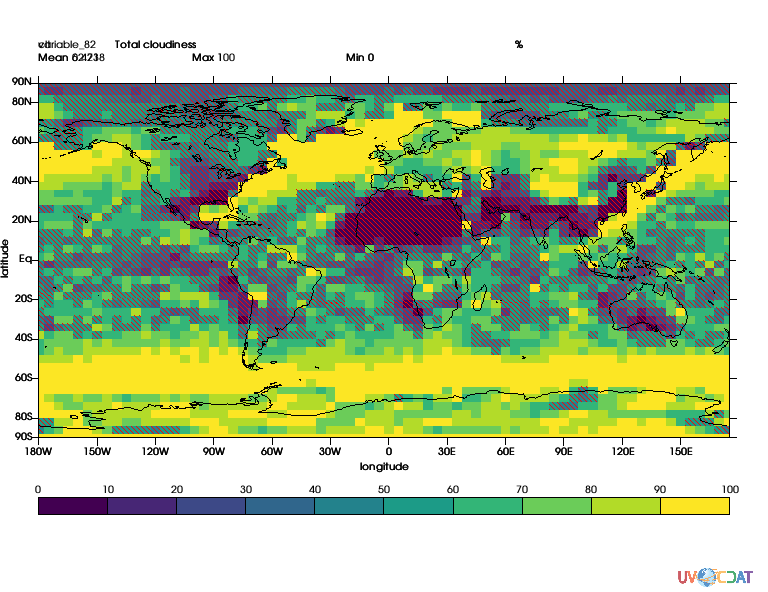

In [12]:
gm2.fillareaopacity = [100.]
gm2.fillareastyle = "hatch"
gm2.fillareacolors = ["red"]
x.clear()
x.plot(clt,gm)
x.plot(bad,gm2,tmpl2)

## Patterns legend<a id=legend></a>
[(top)](#top)

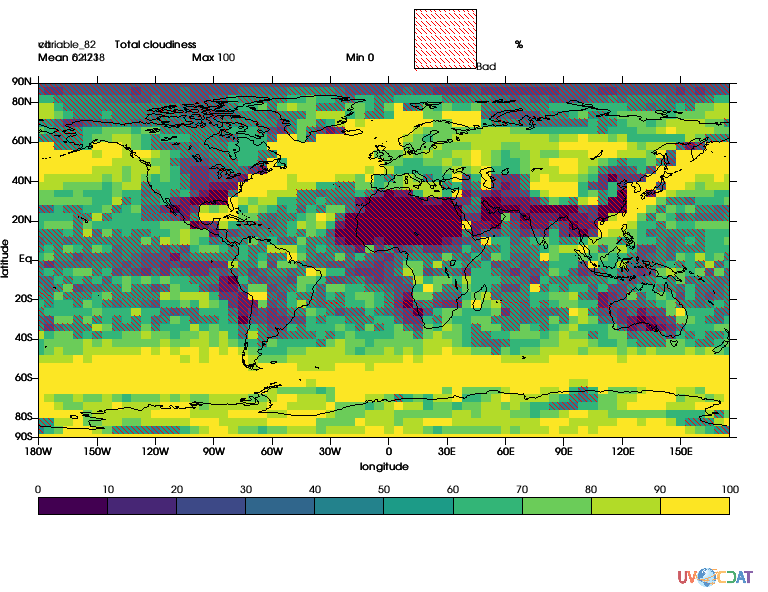

In [13]:
# could even have a legend
tmpl2.legend.x1 = .54
tmpl2.legend.x2 = .62
tmpl2.legend.y1 = .885
tmpl2.legend.y2 = .985
tmpl2.legend.priority=1
gm2.legend = {.5:" Bad"}
x.clear()
x.plot(clt,gm)
x.plot(bad,gm2,tmpl2)